In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [21]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train/*')

In [7]:
folders

['C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train\\Acne',
 'C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train\\Normal',
 'C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train\\Varicella']

In [8]:
x = Flatten()(vgg16.output)

In [9]:
len(folders)

3

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 2941 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 143 images belonging to 3 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\admin\AppData\Local\Temp\ipykernel_4244\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
295/295 [==============================] - 884s 3s/step - loss: 0.4412 - accuracy: 0.8443 - val_loss: 1.4787 - val_accuracy: 0.6154
Epoch 2/10
295/295 [==============================] - 881s 3s/step - loss: 0.2403 - accuracy: 0.9235 - val_loss: 2.4480 - val_accuracy: 0.5804
Epoch 3/10
295/295 [==============================] - 886s 3s/step - loss: 0.1993 - accuracy: 0.9327 - val_loss: 1.9982 - val_accuracy: 0.6573
Epoch 4/10
295/295 [==============================] - 908s 3s/step - loss: 0.1594 - accuracy: 0.9480 - val_loss: 2.0158 - val_accuracy: 0.6643
Epoch 5/10
295/295 [==============================] - 897s 3s/step - loss: 0.1141 - accuracy: 0.9599 - val_loss: 2.2308 - val_accuracy: 0.6643
Epoch 6/10
295/295 [==============================] - 895s 3s/step - loss: 0.0825 - accuracy: 0.9680 - val_loss: 2.8660 - val_accuracy: 0.5944
Epoch 7/10
295/295 [==============================] - 897s 3s/step - loss: 0.0696 - accuracy: 0.9755 - val_loss: 2.4761 - val_accuracy: 0.6783

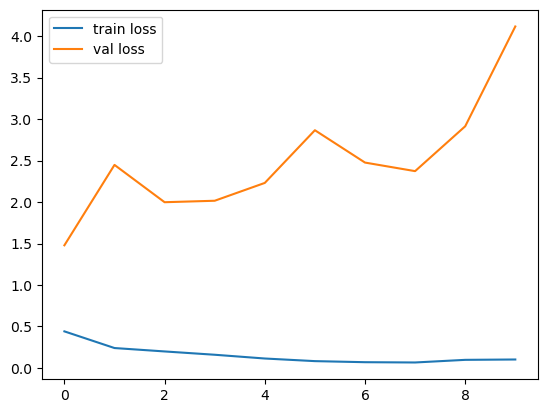

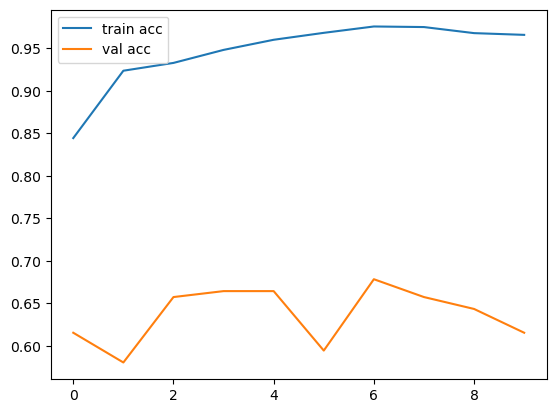

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
model.save('model_vgg16.h5')